In [28]:
from carts_poles import CartsPolesEnv
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# for automatically reloading the imported modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
#Hyperparms
NUM_EPISODES = 10000
MAX_T = 1000
GAMMA = 0.1
ALPHA = 0.5
E_GREEDY = 0.1
num_states = 3
num_actions = 9

In [30]:
# Function approx to compute (makes weights 4 sets of states, and turns all off and on based on which action)
def Q_value(state,action,linear_weights):

    x = np.zeros(num_states*num_actions)
    x[action*num_states:action*num_states+num_states] = state

    return linear_weights @ x

def get_features(state,action):

    x = np.zeros(num_states*num_actions)
    x[action*num_states:action*num_states+num_states] = state

    return x

# Get action e-greedy
def get_action(linear_weights, state):
    p_epsilon = np.random.uniform(0,1)
    if p_epsilon < E_GREEDY:
        return np.argmax(np.random.uniform(0,1,(1,num_actions)))

    q_s = np.zeros(num_actions)

    for i in range(0,num_actions):
        q_s[i] = Q_value(state,i,linear_weights)

    return np.argmax(q_s)

In [31]:
# Plotting Stuff
ep_length = np.zeros(NUM_EPISODES)
td_error = np.zeros(NUM_EPISODES)


# Lets get some linear weights
linear_weights = np.zeros(num_states*num_actions)

# init env
env = CartsPolesEnv()

done = False

# Loop through episodes
for episode in range(NUM_EPISODES):

    env.reset()
    done = False

    state,_,_ = env.step(env.dt,1)

    action = get_action(linear_weights, state)

    error_episode = 0

    # Generate an episode
    for t in range(MAX_T):

        action_prime = get_action(linear_weights,state)

        state_prime, reward, done = env.step(env.dt,action_prime)

        # Linear SARSA update (Section 10.1, psuedocode) 
        td_update = (reward + GAMMA * Q_value(state_prime,action_prime,linear_weights)-Q_value(state,action,linear_weights))      
        linear_weights = linear_weights + ALPHA*td_update * get_features(state,action)
        
        linear_weights = linear_weights/np.linalg.norm(linear_weights)
        

        error_episode += np.sum(td_update)

        state  = state_prime
        action = action_prime
#         print(action,state[2]-state[0])
#         print(linear_weights)

        if done or t == MAX_T - 1:
            ep_length[episode] = t * env.dt
            td_error[episode] = error_episode
            break

    if (episode >= 1000) and episode % 1000 == 0:
        print("Episode %d completed, avg time now is  %f seconds" % (episode, ep_length[episode-1000:episode].mean()))
        
print(linear_weights)

Episode 1000 completed, avg time now is  0.583170 seconds
Episode 2000 completed, avg time now is  0.546620 seconds
Episode 3000 completed, avg time now is  0.571250 seconds
Episode 4000 completed, avg time now is  0.556400 seconds
Episode 5000 completed, avg time now is  0.525600 seconds
Episode 6000 completed, avg time now is  0.527030 seconds
Episode 7000 completed, avg time now is  0.540600 seconds
Episode 8000 completed, avg time now is  0.585120 seconds
Episode 9000 completed, avg time now is  0.510440 seconds
[-6.67102607e-02  8.95261656e-02  3.46603205e-02 -1.02978490e-03
  1.20609068e-03  2.54393401e-04 -6.75384219e-01  4.13201492e-01
 -4.22254664e-01 -1.83773244e-07  2.13790721e-07  4.91677774e-08
 -3.14719221e-05  3.92699601e-05  1.14963861e-05 -3.21006197e-03
  3.85848220e-03  9.40667328e-04 -3.39744931e-02  3.48087333e-02
  1.25460683e-03 -2.55281270e-01  2.65856142e-01  1.66651652e-02
 -1.41165084e-01  1.50134284e-01  1.28598530e-02]


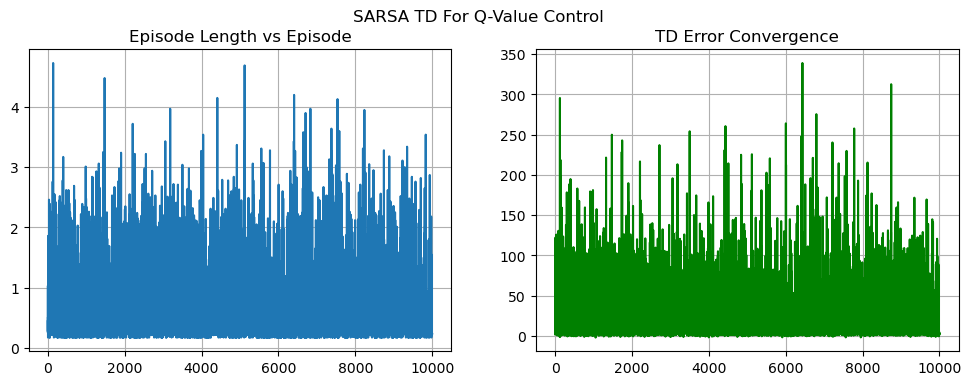

[-6.67102607e-02  8.95261656e-02  3.46603205e-02 -1.02978490e-03
  1.20609068e-03  2.54393401e-04 -6.75384219e-01  4.13201492e-01
 -4.22254664e-01 -1.83773244e-07  2.13790721e-07  4.91677774e-08
 -3.14719221e-05  3.92699601e-05  1.14963861e-05 -3.21006197e-03
  3.85848220e-03  9.40667328e-04 -3.39744931e-02  3.48087333e-02
  1.25460683e-03 -2.55281270e-01  2.65856142e-01  1.66651652e-02
 -1.41165084e-01  1.50134284e-01  1.28598530e-02]


In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
ax1.plot(range(0,NUM_EPISODES),ep_length)
ax2.plot(range(0,NUM_EPISODES),td_error,c='g')
ax1.title.set_text("Episode Length vs Episode")
ax2.title.set_text("TD Error Convergence")
fig.suptitle('SARSA TD For Q-Value Control')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax1.grid()
ax2.grid()
plt.show()